In [3]:
import pandas as pd 
import numpy as np

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
kaggle_test_df = pd.read_csv('test.csv')

In [7]:
kaggle_test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
784**0.5

28.0

In [9]:
import matplotlib.pyplot as plt

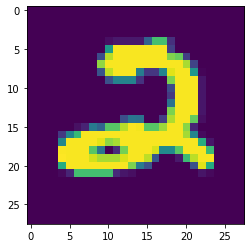

In [11]:
plt.imshow(kaggle_test_df.iloc[0].to_numpy().reshape(28,28))

In [12]:
kaggle_test_df.to_numpy().reshape(28000,28,28)[0].shape

(28, 28)

In [13]:
train.shape

(42000, 785)

In [15]:
test_length = int(42000*25/100)
test_length

10500

In [16]:
X = train.drop('label',axis=1)

In [17]:
y= train['label']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_length, random_state=42)

In [20]:
X_train = X_train.to_numpy().reshape(31500,28,28)


In [21]:
X_test = X_test.to_numpy().reshape(10500,28,28)

In [22]:
X_train.shape

(31500, 28, 28)

In [23]:
X_test.shape

(10500, 28, 28)

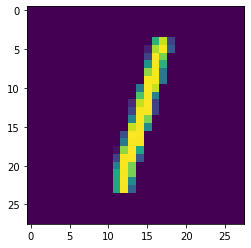

In [24]:
plt.imshow(X_test[9])

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [27]:
y_train_cat.shape

(31500, 10)

In [28]:
# Scaling the data
X_train = X_train/255
X_test = X_test/255

In [29]:
X_train.max()

1.0

In [30]:
X_train = X_train.reshape(31500,28,28,1)

In [31]:
X_test = X_test.reshape(10500,28,28,1)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
data_gen = ImageDataGenerator(rotation_range=0.1,zoom_range=0.1,width_shift_range=0.2,height_shift_range=0.1,vertical_flip=True,horizontal_flip=True)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [33]:
model = Sequential()

model.add(Conv2D(32,(4,4),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(4,4),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
model = Sequential()

model.add(Conv2D(32,(4,4),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(4,4),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [38]:
model.fit(X_train,y_train_cat,validation_data=(X_test,y_test_cat),epochs=10,callbacks=[early_stop])

Epoch 1/10
985/985 [==============================] - 31s 30ms/step - loss: 0.1887 - accuracy: 0.9431 - val_loss: 0.0701 - val_accuracy: 0.9786
Epoch 2/10
985/985 [==============================] - 29s 29ms/step - loss: 0.0574 - accuracy: 0.9819 - val_loss: 0.0553 - val_accuracy: 0.9822
Epoch 3/10
985/985 [==============================] - 29s 29ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0567 - val_accuracy: 0.9818
Epoch 4/10
985/985 [==============================] - 29s 29ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0476 - val_accuracy: 0.9855
Epoch 5/10
985/985 [==============================] - 29s 29ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 6/10
985/985 [==============================] - 29s 29ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0383 - val_accuracy: 0.9889
Epoch 7/10
985/985 [==============================] - 29s 30ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0389 - val_accuracy:

In [39]:
mod_his = pd.DataFrame(model.history.history)

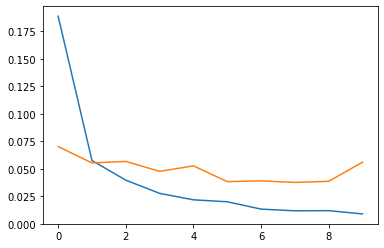

In [40]:
plt.plot(mod_his[['loss','val_loss']])

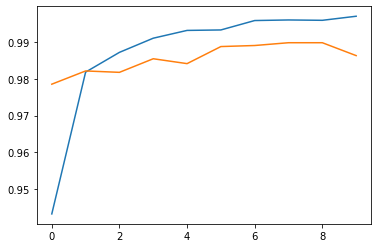

In [41]:
plt.plot(mod_his[['accuracy','val_accuracy']])

In [42]:
predictions = np.argmax(model.predict(X_test),axis=1)


329/329 [==============================] - 4s 11ms/step


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1025
           1       1.00      0.99      0.99      1146
           2       0.97      1.00      0.98      1072
           3       0.98      0.99      0.98      1151
           4       1.00      0.98      0.99      1024
           5       0.98      0.99      0.98       898
           6       0.99      0.99      0.99      1010
           7       0.99      0.98      0.98      1135
           8       0.99      0.99      0.99      1005
           9       0.99      0.98      0.98      1034

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [ ]:
# Building a hyperperamter tuned CNN model to get better results.

In [45]:
from tensorflow import keras

In [52]:
def build_model(hp): 
    
    model = keras.Sequential([
        
        
        keras.layers.Conv2D(
            
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
            
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
    
  
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
  
    return model

In [54]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [55]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3,directory='output',project_name="Mnist")

INFO:tensorflow:Reloading Oracle from existing project output\Mnist\oracle.json
INFO:tensorflow:Reloading Tuner from output\Mnist\tuner0.json


In [56]:
tuner_search.search(X_train,y_train_cat,epochs=3,validation_split=0.1)

Trial 3 Complete [00h 08m 49s]
val_accuracy: 0.9701587557792664

Best val_accuracy So Far: 0.9850793480873108
Total elapsed time: 00h 08m 49s
INFO:tensorflow:Oracle triggered exit


In [84]:
tuner_search.results_summary()

Results summary
Results in output\Mnist
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 64
learning_rate: 0.001
Score: 0.9850793480873108
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 3
dense_1_units: 32
learning_rate: 0.001
Score: 0.9809523820877075
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.01
Score: 0.9701587557792664


In [85]:
model = Sequential()

model.add(Conv2D(96,(3,3),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(48,(5,5),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(80,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [86]:
model.fit(X_train,y_train_cat,validation_data=(X_test,y_test_cat),epochs=10,callbacks=[early_stop])

Epoch 1/10
985/985 [==============================] - 72s 72ms/step - loss: 0.1903 - accuracy: 0.9424 - val_loss: 0.0688 - val_accuracy: 0.9801
Epoch 2/10
985/985 [==============================] - 71s 72ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0687 - val_accuracy: 0.9786
Epoch 3/10
985/985 [==============================] - 80s 81ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0522 - val_accuracy: 0.9832
Epoch 4/10
985/985 [==============================] - 74s 75ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0480 - val_accuracy: 0.9848
Epoch 5/10
985/985 [==============================] - 81s 82ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0407 - val_accuracy: 0.9884
Epoch 6/10
985/985 [==============================] - 82s 83ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 7/10
985/985 [==============================] - 88s 89ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0356 - val_accuracy:

In [87]:
predictions = np.argmax(model.predict(X_test),axis=1)


329/329 [==============================] - 6s 19ms/step


In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1025
           1       1.00      0.99      0.99      1146
           2       0.99      0.99      0.99      1072
           3       1.00      0.98      0.99      1151
           4       0.99      0.99      0.99      1024
           5       0.96      0.99      0.98       898
           6       0.99      1.00      0.99      1010
           7       0.99      1.00      0.99      1135
           8       0.99      0.98      0.99      1005
           9       0.99      0.98      0.99      1034

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500

